### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
library(ggplot2)

In [2]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [3]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [4]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [5]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What is the most common month to travel in New York?**

Reading in the New York dataset above, we can see that Start.Time contains date information, so it is the variable I will be using to answer this question. 

The format of the variable is year-month-day 00:00:00. To get the month data I am going to extract the date from Start.Date and put it in a new column called dates.

First I want to see a list of the columns we have to start.

In [6]:
names(ny)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
[5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
[9] "Birth.Year"

Next I am creating the column 'dates', extracting the date values into it, and confirming its creation.

In [7]:
ny$dates <- as.Date(ny$Start.Time)

In [8]:
names(ny)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
 [5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
 [9] "Birth.Year"    "dates"

Next I want to see all of the values in the date column.

In [9]:
table(ny$dates)


2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-05 2017-01-06 2017-01-07 
       138         74        120        269        241        181         37 
2017-01-08 2017-01-09 2017-01-10 2017-01-11 2017-01-12 2017-01-13 2017-01-14 
        45        128        211        257        319        248        103 
2017-01-15 2017-01-16 2017-01-17 2017-01-18 2017-01-19 2017-01-20 2017-01-21 
       132        195        154        222        281        199        237 
2017-01-22 2017-01-23 2017-01-24 2017-01-25 2017-01-26 2017-01-27 2017-01-28 
       152         99        130        277        269        253        168 
2017-01-29 2017-01-30 2017-01-31 2017-02-01 2017-02-02 2017-02-03 2017-02-04 
       166        234        206        284        278        252        148 
2017-02-05 2017-02-06 2017-02-07 2017-02-08 2017-02-10 2017-02-11 2017-02-12 
       163        288        167        342         14         67         47 
2017-02-13 2017-02-14 2017-02-15 2017-02-16 2017-02-17 2017-02-

Next, I will be extracting the month value from the date column and putting those values into a new column called 'month'.

In [10]:
ny$month <- format(as.Date(ny$dates, format = "%y/%m/%d"), "%m")

Now I am going to confirm the creation of the month column.

In [11]:
names(ny)

[1] "X"             "Start.Time"    "End.Time"      "Trip.Duration"
 [5] "Start.Station" "End.Station"   "User.Type"     "Gender"       
 [9] "Birth.Year"    "dates"         "month"

Next, I want to see the contents of the month column.

In [12]:
table(ny$month)


   01    02    03    04    05    06 
 5745  6364  5820 10661 12180 14000 

Since this dataset only gives us data from the first 6 months of the year, we only get values from 01-06, January to June.

And we can see from this data that June, as denoted by 06, has the most travelers.

Let's plot this data so we can visualize the number of people that travel in New York by month.

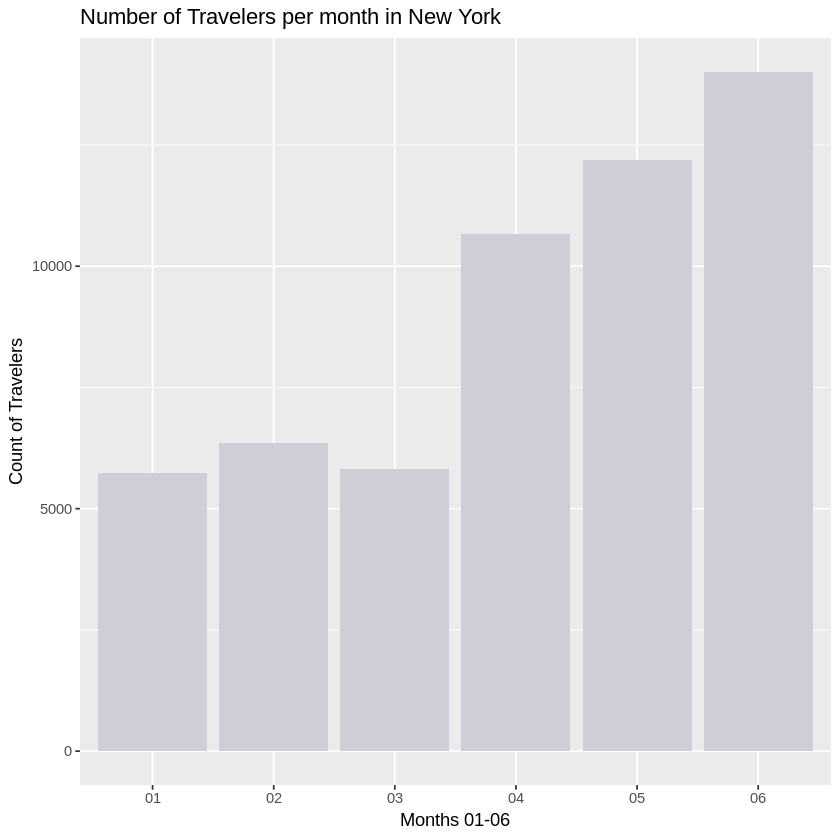

In [13]:
ggplot(ny, aes(x = month)) +
geom_bar(fill = '#D0CDD7') +
labs(title = 'Number of Travelers per month in New York', x = 'Months 01-06', y = 'Count of Travelers')

**From January to June, the most common month to travel in New York is June.**

### Question 2

**What are the earliest and most recent years of birth in Chicago?**

I am going to start by looking at all of the values in the Birth.Year column.

In [14]:
table(chi$Birth.Year)


1899 1900 1901 1918 1930 1939 1940 1942 1944 1945 1946 1947 1948 1949 1950 1951 
   2    2    1    1    1    2    2    3    2    5   10    1    4   19    6   22 
1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 
  29   17   34   24   46   39   44   51   68   58   84   58   83   96   90   77 
1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 
  89  105  118   88   96  102  100  122  119  139  149  161  170  222  241  249 
1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 
 304  280  350  360  362  388  384  357  324  217  155   58   43   32   12    3 
2000 2002 
   2    1 

Looking at this data, we can see the earliest year of birth is 1899 and the most recent is 2002.

In addition to this, I want to show a couple other ways to find these numbers.

Using the min() and max() functions, I used 'na.rm = TRUE' as a parameter so the functions would ignore any missing or null values.

In [15]:
min(chi$Birth.Year, na.rm = TRUE)

[1] 1899

In [16]:
max(chi$Birth.Year, na.rm = TRUE)

[1] 2002

Another way to get these values is to use the fivenum() function. This function gets the minimum, first quartile, median, third quartile, and maximum of a dataset.

In [17]:
fivenum(chi$Birth.Year)

[1] 1899 1975 1984 1989 2002

Below is a histogram of this data.

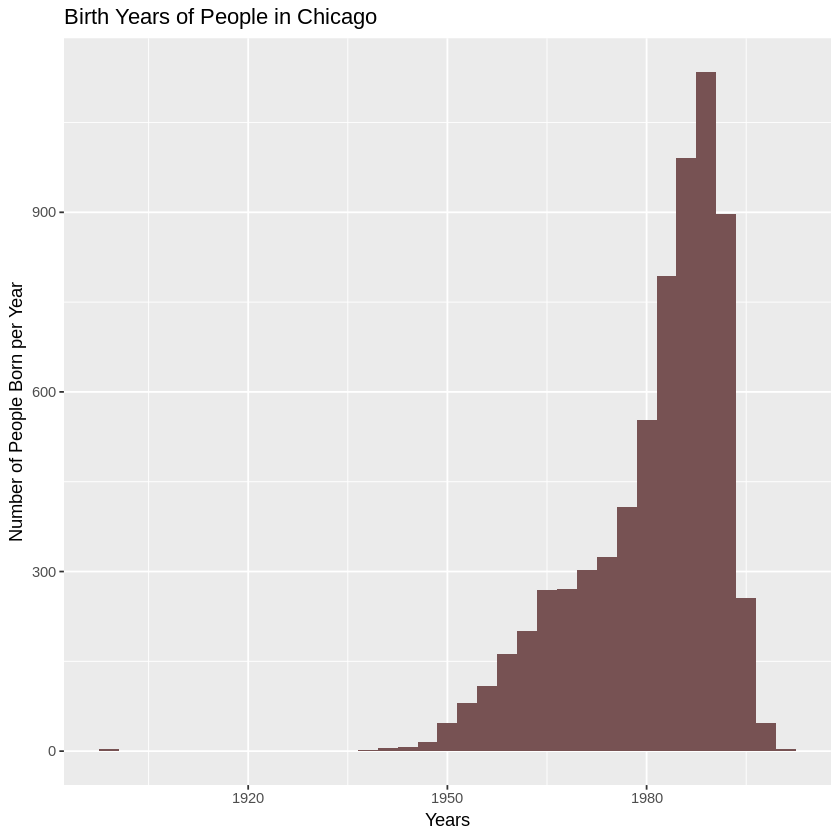

In [18]:
ggplot(subset(chi, !is.na(Birth.Year)), aes(x = Birth.Year)) +
geom_histogram(binwidth = 3, fill = '#775253') +
labs(title = 'Birth Years of People in Chicago', x = 'Years', y = 'Number of People Born per Year')

**In Chicago the earliest birth year is 1899 and the most recent birth year is 2002.**

### Question 3

**What are the counts of each user type in Washington?**

I want to start by looking at the values in the User.Type variable.

In [19]:
table(wash$User.Type)


             Customer Subscriber 
         1      23450      65600 

We can see there is 1 value that is blank. Let's plot this data and look more into that.

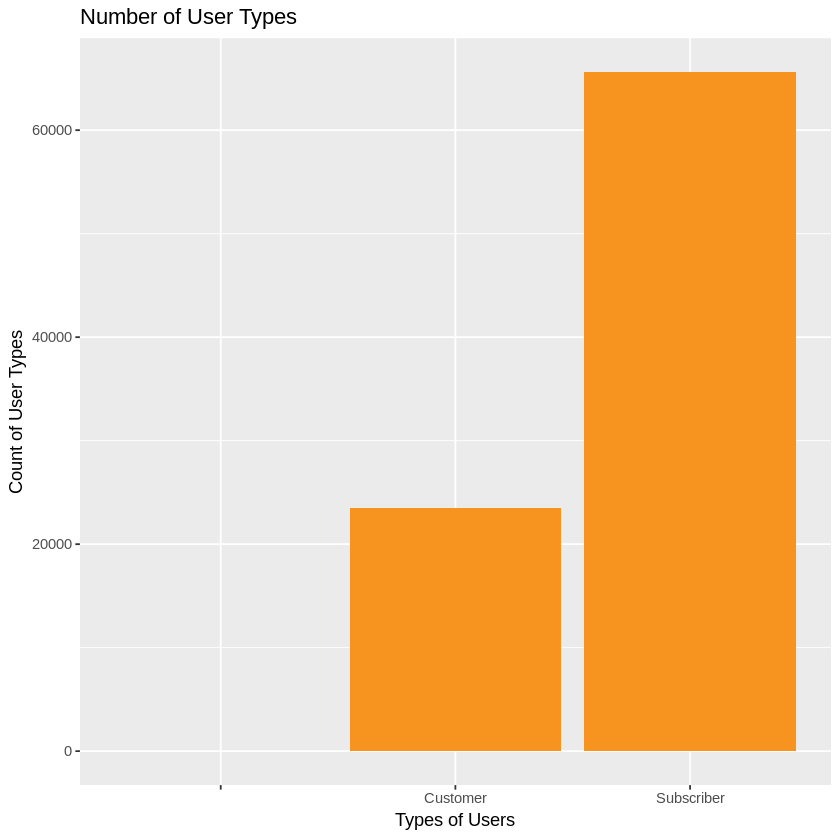

In [20]:
ggplot(subset(wash, !is.na(User.Type)), aes(x = User.Type)) +
geom_bar(fill = '#F79420') +
labs(title = 'Number of User Types', x = 'Types of Users', y = 'Count of User Types')

In the above plot, we can assume the blank user type is representing the blank value in the previous code block. 

I am going to run the following line of code to convert the blank value to NA.

In [21]:
wash$User.Type[wash$User.Type == ""] <- NA

Now I am going to check the values of User.Type to confirm the new NA value is being counted as NA. 

In [22]:
table(wash$User.Type, useNA = "ifany")


             Customer Subscriber       <NA> 
         0      23450      65600          1 

We can see that where the blank value was being counted, is now 0, and there is one value under NA.

Now I am going to run the same block of code I ran earlier to see the bar chart now excluding the NA value.

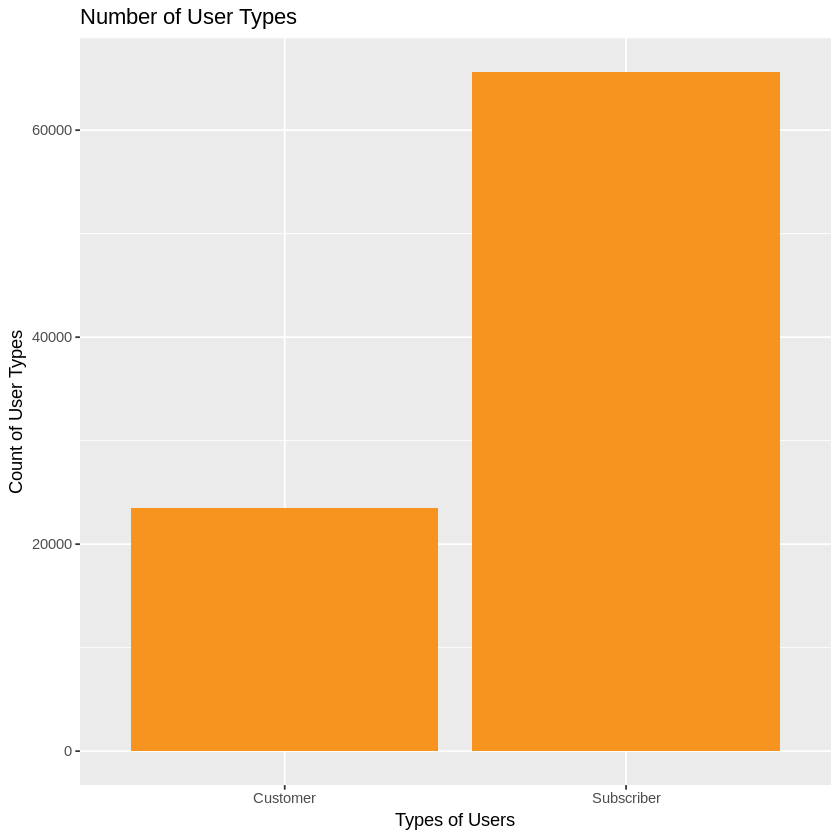

In [23]:
ggplot(subset(wash, !is.na(User.Type)), aes(x = User.Type)) +
geom_bar(fill = '#F79420') +
labs(title = 'Number of User Types', x = 'Types of Users', y = 'Count of User Types')

Now we have a much nicer looking chart that is only displaying non-null values.

**The user types of the bikeshare service in Washington are Customer and Subscriber. There are 23450 Customers and 65600 Subscribers.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [24]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')